In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("./cic-ids.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529990 entries, 0 to 4529989
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Bwd Pkt Len Min    int64  
 3   Flow Byts/s        float64
 4   Fwd IAT Tot        int64  
 5   Fwd IAT Mean       float64
 6   Fwd IAT Min        int64  
 7   Bwd IAT Tot        int64  
 8   Bwd IAT Std        float64
 9   Bwd IAT Max        int64  
 10  Bwd IAT Min        int64  
 11  Fwd PSH Flags      int64  
 12  Fwd URG Flags      int64  
 13  Fwd Pkts/s         float64
 14  Bwd Pkts/s         float64
 15  Pkt Len Min        int64  
 16  Pkt Len Std        float64
 17  Pkt Len Var        float64
 18  FIN Flag Cnt       int64  
 19  PSH Flag Cnt       int64  
 20  ACK Flag Cnt       int64  
 21  URG Flag Cnt       int64  
 22  ECE Flag Cnt       int64  
 23  Down/Up Ratio      int64  
 24  Fwd Seg Size Avg   float64
 25  Bwd Seg Size Avg  

In [9]:
feature_list = data.columns.values.tolist()

In [10]:
feature_list

['Dst Port',
 'Protocol',
 'Bwd Pkt Len Min',
 'Flow Byts/s',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd URG Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Std',
 'Idle Min',
 'Label']

In [11]:
x = data.drop(['Label'] , axis = 1).values
y = data['Label'].values

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [13]:
# scaling the dataset.
ro_scaler = RobustScaler()
x_scaled = ro_scaler.fit_transform(x)


In [14]:

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_scaled)

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size= 0.2 , random_state=42)

In [16]:
x_train.shape, x_test.shape

((3623992, 36), (905998, 36))

In [17]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)
    
    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

LOGISTIC REGRESSION

In [18]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

In [19]:

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)


Logistic Regression Performance on the test set: Cross Validation Score = 0.9280


In [20]:
model = LogisticRegression()
run_experiment(model, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

R^2 :  0.7045597535343582
MAE : 0.07385998644588619
RMSE: 0.27177193829732715
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    453456
           1       0.91      0.94      0.93    452542

    accuracy                           0.93    905998
   macro avg       0.93      0.93      0.93    905998
weighted avg       0.93      0.93      0.93    905998



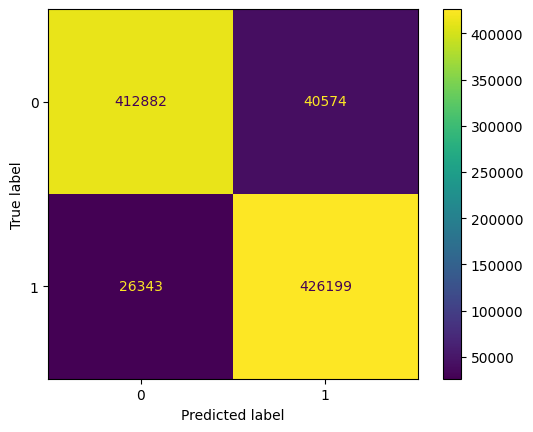

Accuracy:  0.9261400135541138


In [21]:
y_pred = model.predict(x_testcpy)
cm = confusion_matrix(y_testcpy, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()
print("Accuracy: ", accuracy_score(y_testcpy, y_pred))

RANDOM FOREST

In [22]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

In [23]:


random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9671


In [24]:
y_pred = random.predict(x_testcpy)
print("Accuracy: ", accuracy_score(y_testcpy, y_pred))

Accuracy:  0.9670242097664675


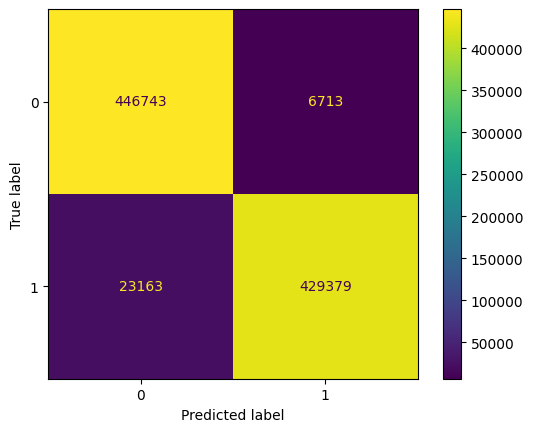

In [25]:
cm = confusion_matrix(y_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [26]:
x_train_srnn = np.copy(x_train)
x_test_srnn = np.copy(x_test)
y_train_srnn = np.copy(y_train)
y_test_srnn = np.copy(y_test)

In [27]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(x_train_srnn.shape[1], 1), return_sequences=True))
model.add(SimpleRNN(units=64, return_sequences=True))
model.add(SimpleRNN(units=64, return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 36, 64)            4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 36, 64)            8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/3
28313/28313 [==============================] - 2862s 101ms/step - loss: 0.1799 - accuracy: 0.9405 - val_loss: 0.1607 - val_accuracy: 0.9500
Epoch 2/3
28313/28313 [==============================] - 2943s 104ms/step - loss: 0.2058 - accuracy: 0.9267 - val_loss: 0.2398 - val_accuracy: 0.9133
Epoch 3/3
28313/28313 [==============================] - 3703s 131ms/step - loss: 0.2264 - accuracy: 0.9185 - val_loss: 0.1718 - val_accuracy: 0.9501


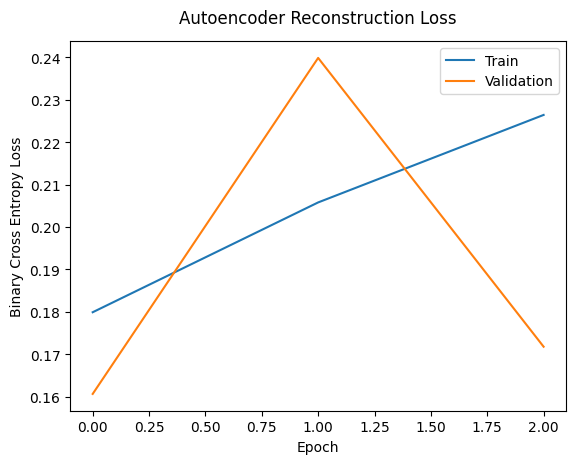

In [32]:
history = model.fit(x_train_srnn.reshape((x_train_srnn.shape[0], x_train_srnn.shape[1], 1)), y_train_srnn, epochs=3, batch_size=128,
                    validation_data=(x_test_srnn.reshape((x_test_srnn.shape[0], x_test_srnn.shape[1], 1)), y_test_srnn))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [33]:
srnn_y_pred = model.predict(x_test_srnn.reshape((x_test_srnn.shape[0], x_test_srnn.shape[1], 1)))
srnn_y_pred = (srnn_y_pred > 0.5)
print("Accuracy:", accuracy_score(y_test_srnn, srnn_y_pred))

28313/28313 [==============================] - 299s 11ms/step
Accuracy: 0.9501378590239714


In [52]:
x_test_srnn_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [54]:
srnn_pred = model.predict(x_test_srnn_reshaped)[:, 0]  # Since it's a binary classification, consider only the first column (probability of class 1)

28313/28313 [==============================] - 290s 10ms/step


In [1]:
logr_pred = logr.predict_proba(x_test)[:, 0]  # Predict probabilities for class 1
random_pred = random.predict_proba(x_test)[:, 0]

NameError: name 'logr' is not defined

In [74]:
# Define weights for each model
weights = [0, 0, 0]  # Adjust weights as per your preference

In [75]:




# Calculate weighted mean of the predictions
ensemble_pred = (logr_pred * weights[0]) + (random_pred * weights[1]) + (srnn_pred * weights[2])

# Threshold the ensemble predictions
threshold = 0  # Adjust threshold as per your preference
ensemble_pred_binary = np.where(ensemble_pred > threshold, 1, 0)

# Calculate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_binary)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.5005044161245389


In [68]:
print("y_test:")
print("Unique values:", np.unique(y_test))
print("Shape:", y_test.shape)
print("Data type:", y_test.dtype)


y_test:
Unique values: [0 1]
Shape: (905998,)
Data type: int64
